In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Read data from CSV file into DataFrame
df = pd.read_csv("/content/TCS__EQ__NSE__NSE__MINUTE.csv")

In [2]:
# Display basic information about the dataset
print("Basic Information:")
df.info()

Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 370546 entries, 0 to 370545
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   timestamp  370546 non-null  object 
 1   open       370405 non-null  float64
 2   high       370405 non-null  float64
 3   low        370405 non-null  float64
 4   close      370405 non-null  float64
 5   volume     370405 non-null  float64
dtypes: float64(5), object(1)
memory usage: 17.0+ MB


In [3]:
import pandas as pd

# Read the CSV file
df = pd.read_csv('/content/TCS__EQ__NSE__NSE__MINUTE.csv')

# Convert the 'timestamp' column to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Save the changes back to the same CSV file (optional)
df.to_csv('/content/TCS__EQ__NSE__NSE__MINUTE.csv', index=False)

print(df['timestamp'].head())  # Just to confirm the format


0   2017-01-02 09:15:00+05:30
1   2017-01-02 09:16:00+05:30
2   2017-01-02 09:17:00+05:30
3   2017-01-02 09:18:00+05:30
4   2017-01-02 09:19:00+05:30
Name: timestamp, dtype: datetime64[ns, UTC+05:30]


In [4]:
# Display basic information about the dataset
print("Basic Information:")
df.info()

Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 370546 entries, 0 to 370545
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype                    
---  ------     --------------   -----                    
 0   timestamp  370546 non-null  datetime64[ns, UTC+05:30]
 1   open       370405 non-null  float64                  
 2   high       370405 non-null  float64                  
 3   low        370405 non-null  float64                  
 4   close      370405 non-null  float64                  
 5   volume     370405 non-null  float64                  
dtypes: datetime64[ns, UTC+05:30](1), float64(5)
memory usage: 17.0 MB


In [5]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
timestamp      0
open         141
high         141
low          141
close        141
volume       141
dtype: int64


In [6]:
# Handling missing values
df.dropna(inplace=True)

# Drop duplicate rows if any
df.drop_duplicates(inplace=True)

In [7]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
timestamp    0
open         0
high         0
low          0
close        0
volume       0
dtype: int64


eda

In [8]:
# Summary statistics for numerical columns
print("\nSummary Statistics:")
print(df.describe())



Summary Statistics:
                open           high            low          close  \
count  370405.000000  370405.000000  370405.000000  370405.000000   
mean     1848.705882    1849.528074    1847.836017    1848.698045   
std       445.711672     445.956437     445.450803     445.709579   
min      1076.500000    1078.030000    1076.500000    1076.750000   
25%      1357.730000    1358.230000    1357.500000    1357.680000   
50%      1967.250000    1968.000000    1966.350000    1967.250000   
75%      2155.850000    2156.650000    2155.000000    2155.850000   
max      2950.050000    2952.000000    2949.500000    2950.050000   

             volume  
count  3.704050e+05  
mean   8.461558e+03  
std    1.003912e+05  
min    0.000000e+00  
25%    2.300000e+03  
50%    4.394000e+03  
75%    8.858000e+03  
max    5.957057e+07  


In [9]:
# Check the correlation between numerical features
print("\nCorrelation Matrix:")
print(df.corr())


Correlation Matrix:
           timestamp      open      high       low     close    volume
timestamp   1.000000  0.905541  0.905710  0.905368  0.905542  0.013106
open        0.905541  1.000000  0.999996  0.999996  0.999994  0.010235
high        0.905710  0.999996  1.000000  0.999993  0.999996  0.010381
low         0.905368  0.999996  0.999993  1.000000  0.999997  0.010002
close       0.905542  0.999994  0.999996  0.999997  1.000000  0.010170
volume      0.013106  0.010235  0.010381  0.010002  0.010170  1.000000


Heatmap - Open vs Close Correlation


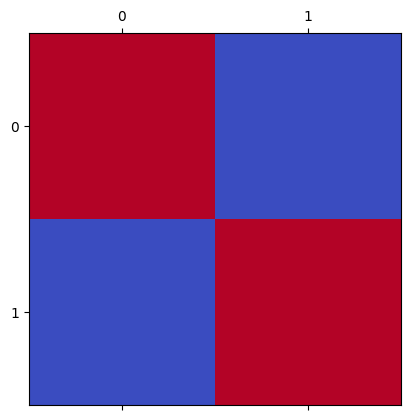

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
# Heatmap for Open and Close
print("Heatmap - Open vs Close Correlation")
plt.matshow(df[["open", "close"]].corr(), cmap="coolwarm")

Heatmap - high vs low Correlation


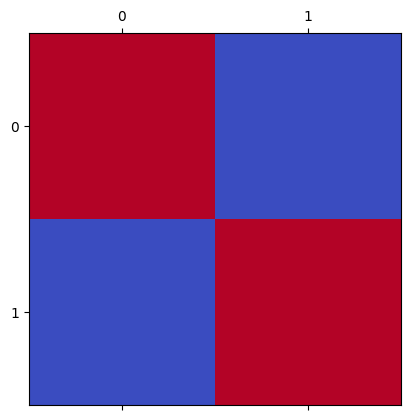

In [11]:

# Heatmap for High and Low
print("Heatmap - high vs low Correlation")
plt.matshow(df[["high", "low"]].corr(), cmap="coolwarm")

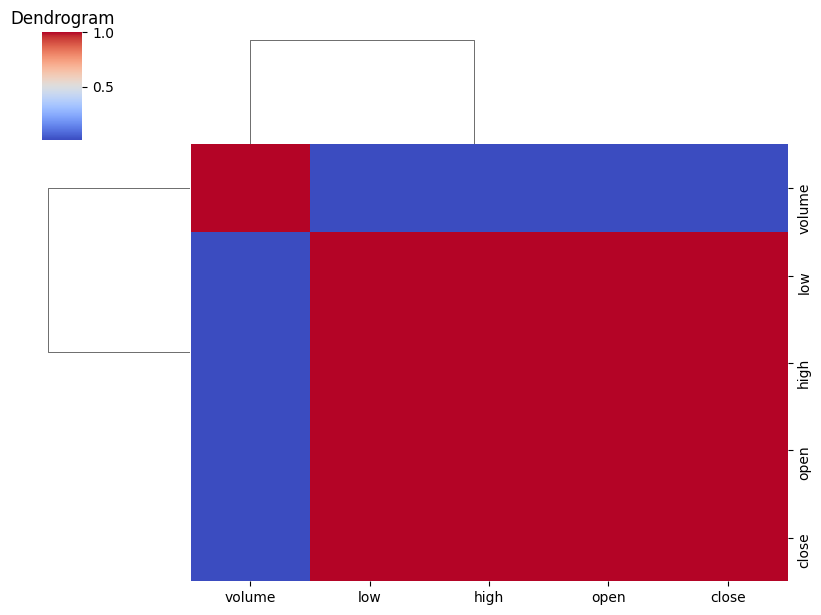

In [12]:
# Dendrogram (for hierarchical clustering)
correlation_matrix = df[['open', 'high', 'low', 'close', 'volume']].corr()
sns.clustermap(correlation_matrix, cmap='coolwarm', figsize=(8, 6))
plt.title('Dendrogram')
plt.show()

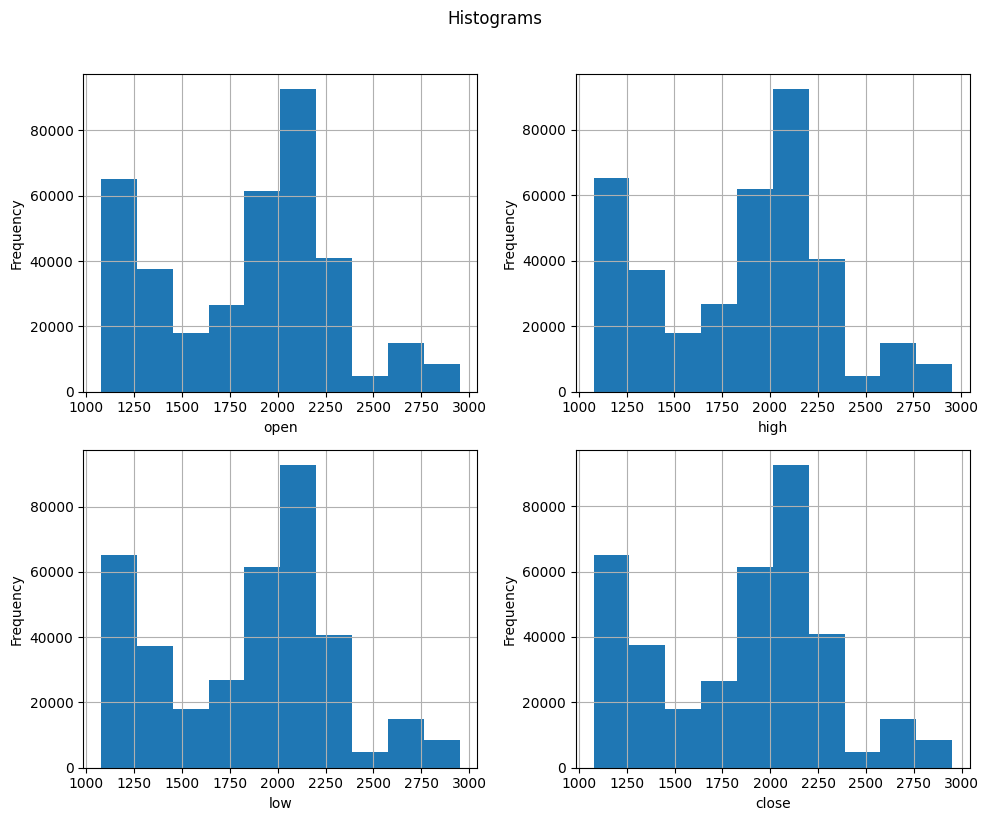

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Read data from CSV file into DataFrame
df = pd.read_csv("/content/TCS__EQ__NSE__NSE__MINUTE.csv")

# Plot histograms for each numerical column
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

for ax, column in zip(axes.flatten(), df.select_dtypes(include='number').columns):
    df[column].hist(ax=ax)
    ax.set_xlabel(column)  # Set x-axis label
    ax.set_ylabel('Frequency')  # Set y-axis label

plt.suptitle('Histograms', x=0.5, y=1.02)
plt.tight_layout()
plt.show()


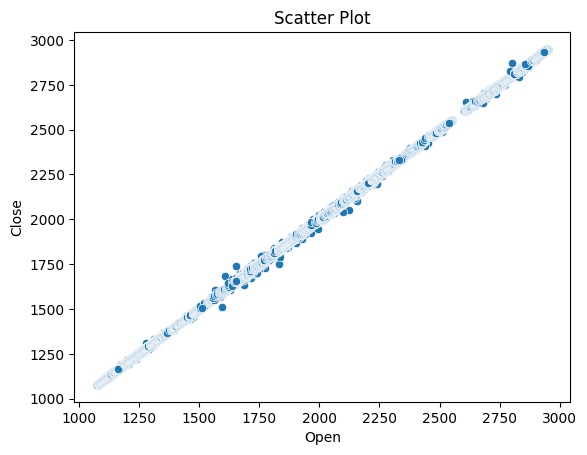

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read data from CSV file into DataFrame
df = pd.read_csv("/content/TCS__EQ__NSE__NSE__MINUTE.csv")

# Scatter Plot
sns.scatterplot(data=df, x='open', y='close')
plt.title('Scatter Plot')
plt.xlabel('Open')  # Set x-axis label
plt.ylabel('Close')  # Set y-axis label
plt.show()


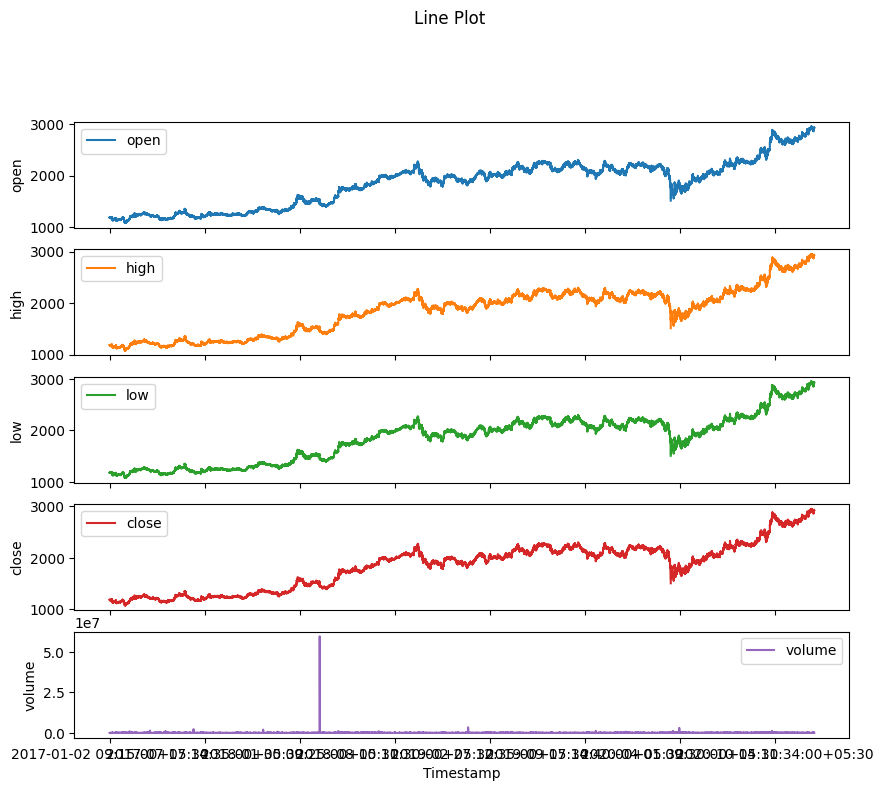

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Read data from CSV file into DataFrame
df = pd.read_csv("/content/TCS__EQ__NSE__NSE__MINUTE.csv")

# Line Plot
axes = df.plot(x='timestamp', y=['open', 'high', 'low', 'close', 'volume'], subplots=True, figsize=(10, 8))

# Set axis labels for each subplot
for ax, column in zip(axes, df[['open', 'high', 'low', 'close', 'volume']]):
    ax.set_xlabel('Timestamp')  # Set x-axis label
    ax.set_ylabel(column)  # Set y-axis label

plt.suptitle('Line Plot', x=0.5, y=1.02)
plt.show()


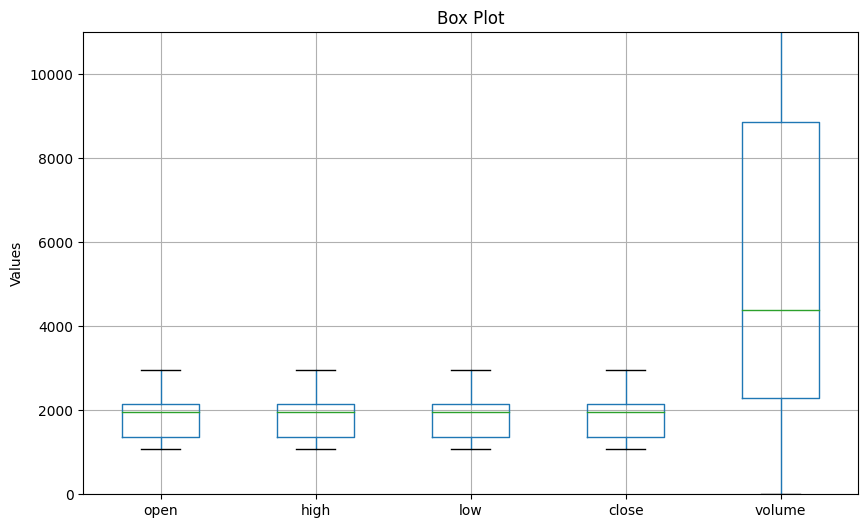

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Read data from CSV file into DataFrame
df = pd.read_csv("/content/TCS__EQ__NSE__NSE__MINUTE.csv")

# Create a smaller figure
fig, ax = plt.subplots(figsize=(10, 6))

# Box Plot
df.boxplot(ax=ax)
ax.set_ylim(0, 11000) # Specify the axis to plot on
plt.title('Box Plot')

# Specify y-axis label
plt.ylabel('Values')  # Add y-axis label

# Show the plot
plt.show()


<ipython-input-17-cd92547e0e66>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['open'], shade=True)


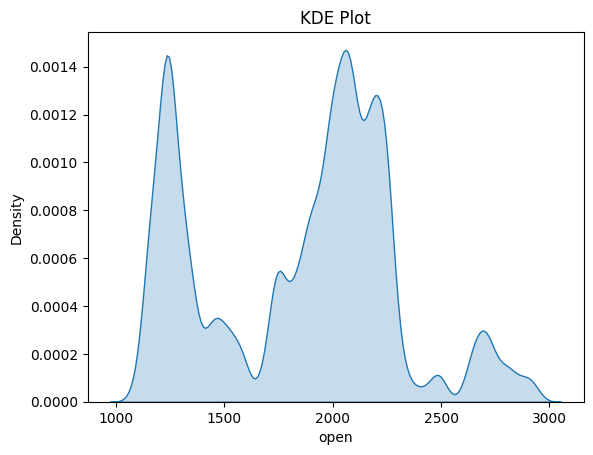

In [17]:
# KDE Plot
sns.kdeplot(df['open'], shade=True)
plt.title('KDE Plot')
plt.show()

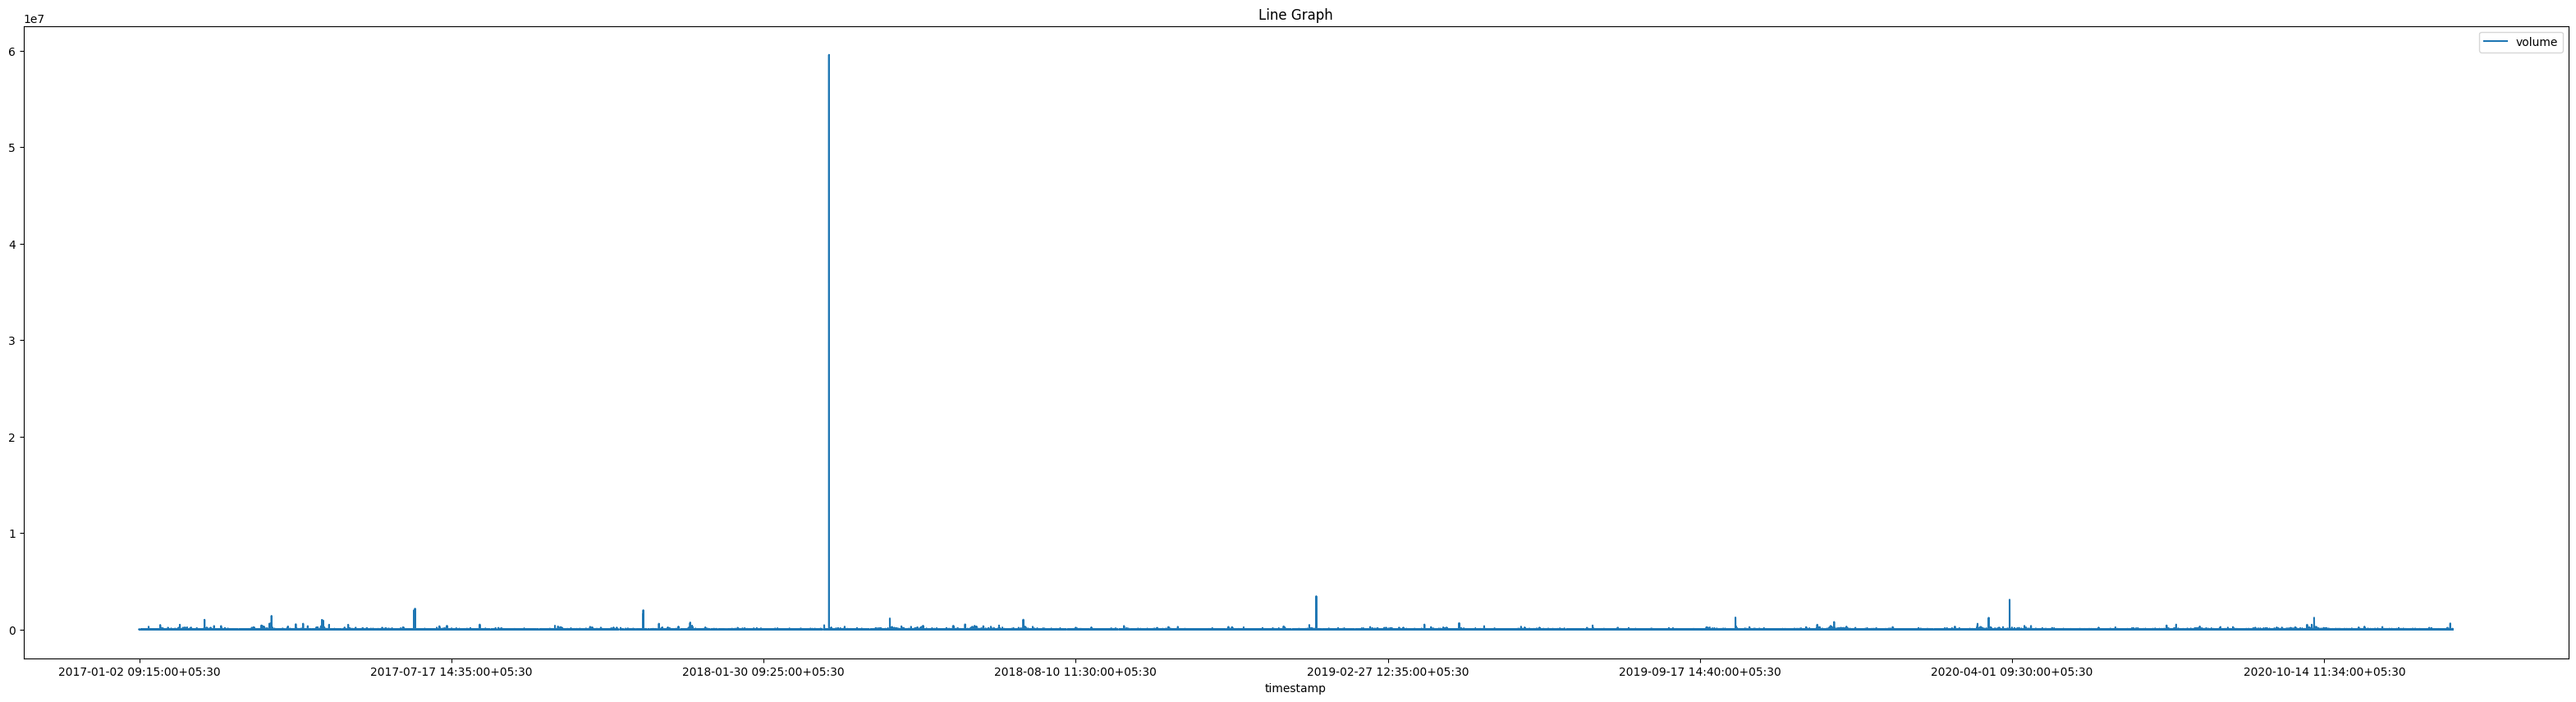

In [18]:
# Line Graph
df.plot(x='timestamp', y='volume', figsize=(40, 10))
plt.title('Line Graph')
plt.show()

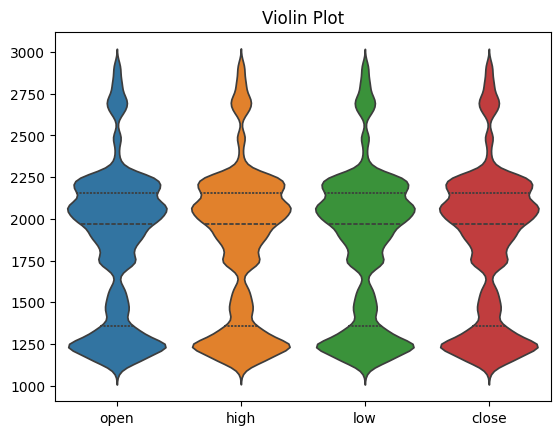

In [19]:
# Violin Plot
sns.violinplot(data=df[['open', 'high', 'low', 'close']], inner='quartile')
plt.title('Violin Plot')
plt.show()

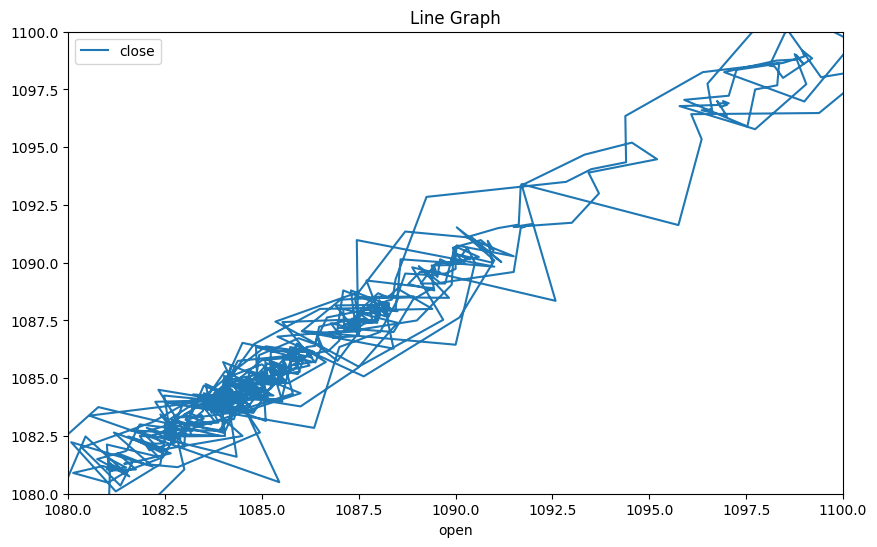

In [20]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame

# Plotting the data
ax = df.plot(x='open', y='close', figsize=(10, 6))

# Setting the x and y limits
ax.set_xlim(1080, 1100)
ax.set_ylim(1080, 1100)

# Adding title
plt.title('Line Graph')

# Display the plot
plt.show()


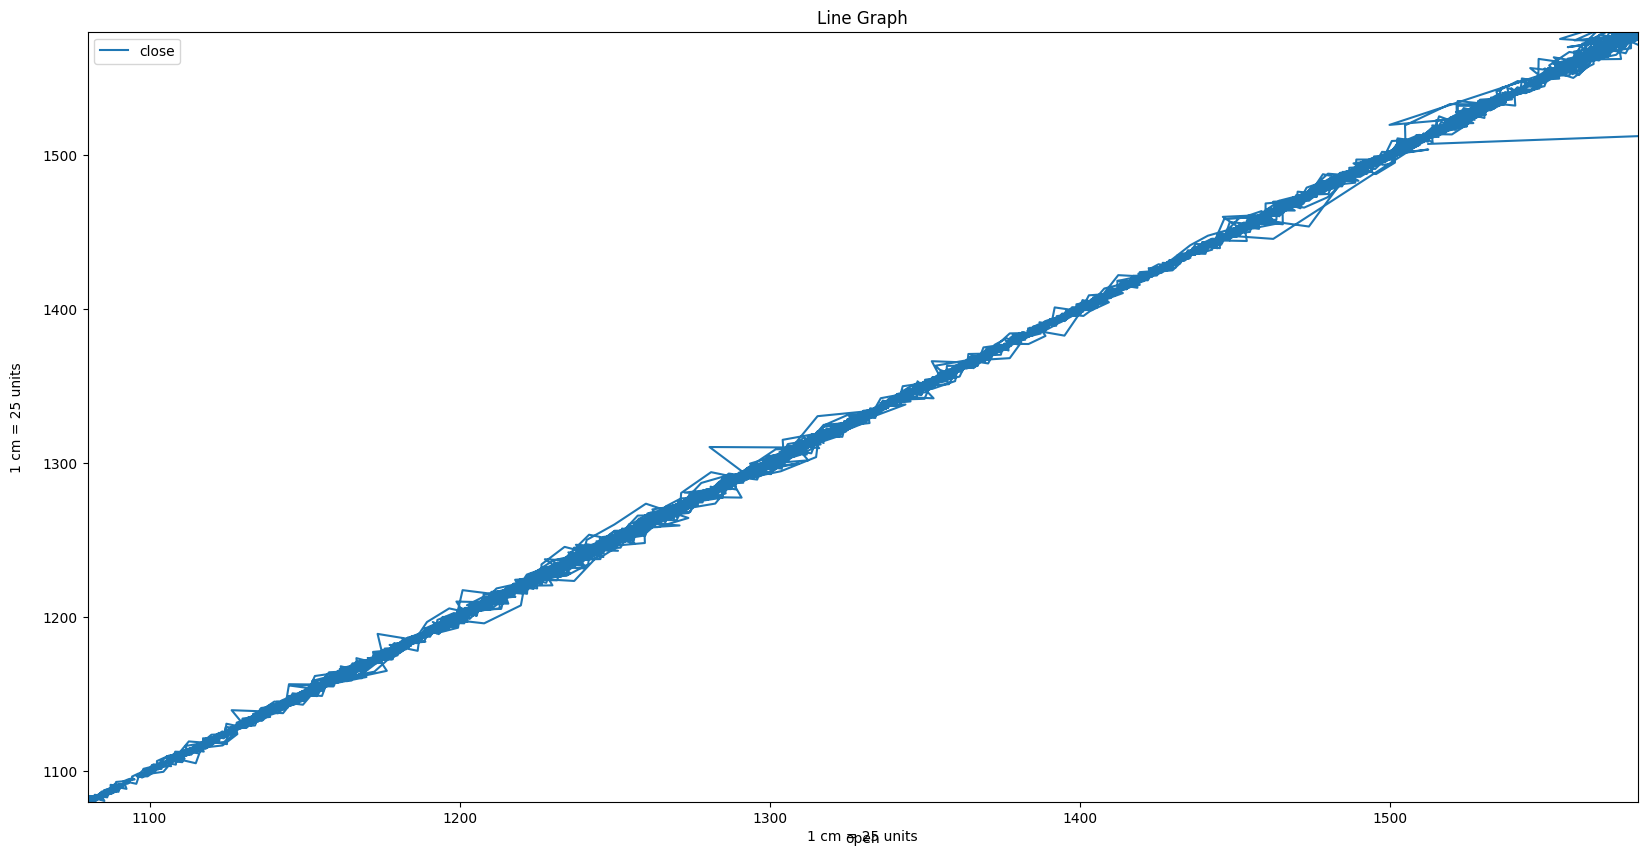

In [21]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame

# Plotting the data
ax = df.plot(x='open', y='close', figsize=(20, 10))

# Setting the x and y limits
ax.set_xlim(1080, 1100)
ax.set_ylim(1080, 1100)
# For example, if you want 1 cm to represent 10 units on both axes
# Calculate the range of units covered by 1 cm
units_per_cm = 25

# Calculate the range in data coordinates (assuming 1 cm = 10 units)
x_range = units_per_cm * (ax.get_xlim()[1] - ax.get_xlim()[0])
y_range = units_per_cm * (ax.get_ylim()[1] - ax.get_ylim()[0])

# Set the limits accordingly
ax.set_xlim(ax.get_xlim()[0], ax.get_xlim()[0] + x_range)
ax.set_ylim(ax.get_ylim()[0], ax.get_ylim()[0] + y_range)

# Adding title
plt.title('Line Graph')

# Annotate x-axis scale
x_scale_annotation = f'1 cm = {units_per_cm} units'
ax.annotate(x_scale_annotation, xy=(0.5, -0.05), xycoords='axes fraction', ha='center')

# Annotate y-axis scale
y_scale_annotation = f'1 cm = {units_per_cm} units'
ax.annotate(y_scale_annotation, xy=(-0.05, 0.5), xycoords='axes fraction', va='center', rotation=90)

# Display the plot
plt.show()


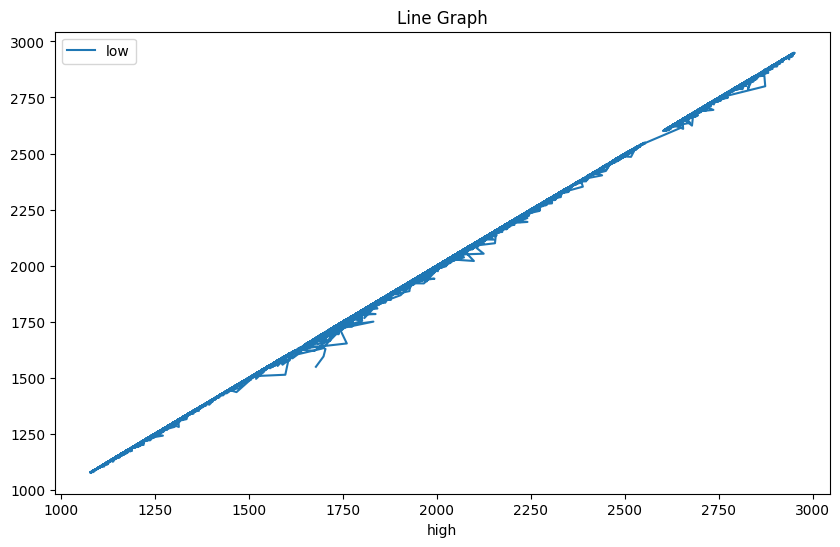

In [22]:
df.plot(x='high', y='low', figsize=(10, 6))
plt.title('Line Graph')
plt.show()


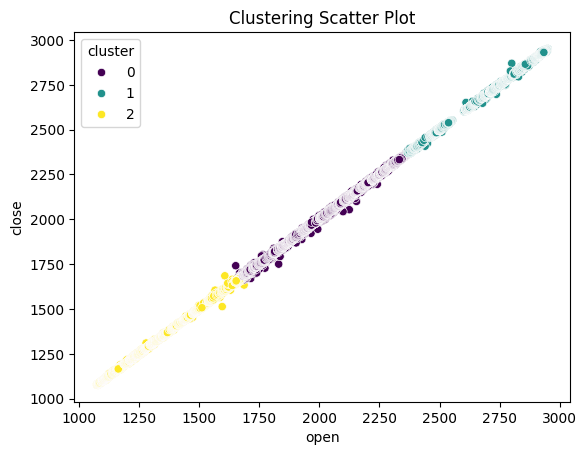

In [23]:
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with missing values
# Let's fill missing values with 0
df_filled = df.fillna(0)

# Fit KMeans clustering
kmeans = KMeans(n_clusters=3)
df['cluster'] = kmeans.fit_predict(df_filled[['open', 'close']])

# Plot clustering scatter plot
sns.scatterplot(data=df, x='open', y='close', hue='cluster', palette='viridis')
plt.title('Clustering Scatter Plot')
plt.show()


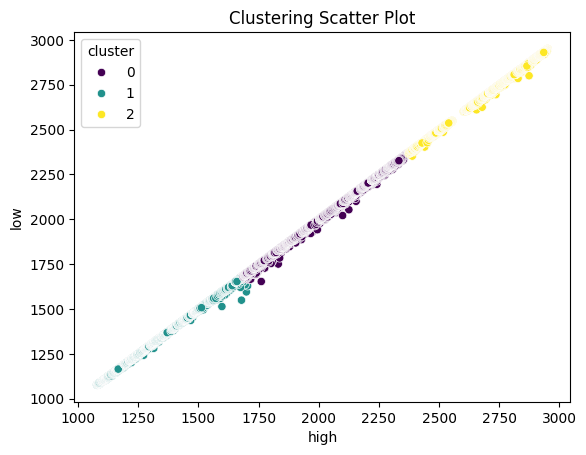

In [24]:
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with missing values
# Let's fill missing values with 0
df_filled = df.fillna(0)

# Fit KMeans clustering
kmeans = KMeans(n_clusters=3)
df['cluster'] = kmeans.fit_predict(df_filled[['high', 'low']])

# Plot clustering scatter plot
sns.scatterplot(data=df, x='high', y='low', hue='cluster', palette='viridis')
plt.title('Clustering Scatter Plot')
plt.show()


In [25]:
!pip install mplfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 3.3 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/mplfinance/_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


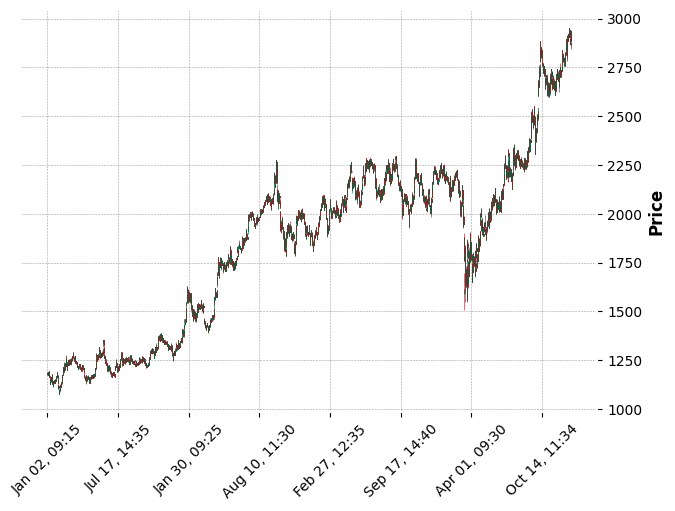

In [26]:
import pandas as pd
import mplfinance as mpf

# Assuming df is your DataFrame with the 'timestamp' column
# Convert 'timestamp' column to datetime format
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Set 'timestamp' column as the index of the DataFrame
df.set_index('timestamp', inplace=True)

# Plot the candlestick chart
mpf.plot(df, type='candle', style='charles')


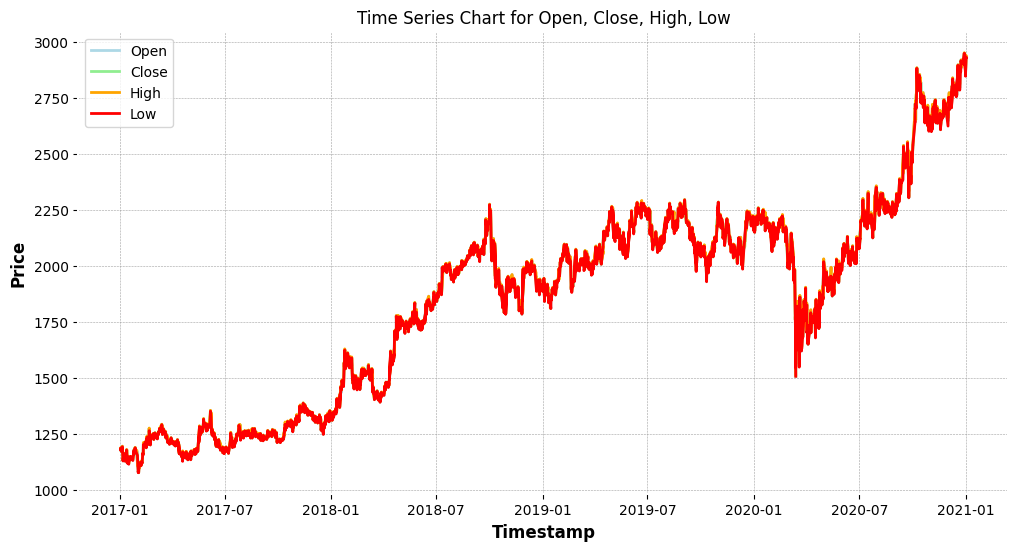

In [27]:
import matplotlib.pyplot as plt

# Plotting Time Series Chart for 'open', 'close', 'high', 'low' columns
plt.figure(figsize=(12, 6))

plt.plot(df.index, df['open'], label='Open', color='lightblue')
plt.plot(df.index, df['close'], label='Close', color='lightgreen')
plt.plot(df.index, df['high'], label='High', color='orange')
plt.plot(df.index, df['low'], label='Low', color='red')

plt.xlabel('Timestamp')
plt.ylabel('Price')
plt.title('Time Series Chart for Open, Close, High, Low')
plt.legend()
plt.show()


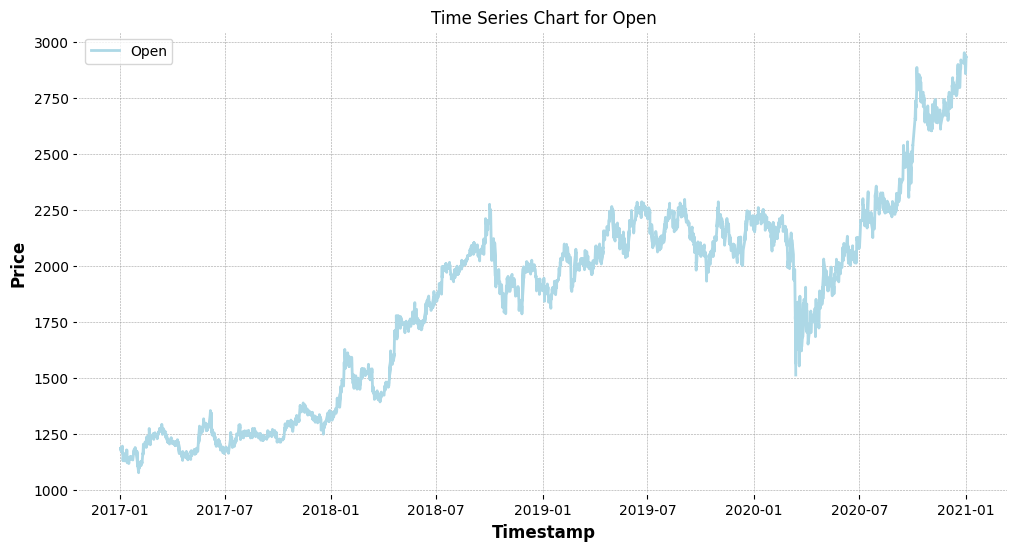

In [28]:
import matplotlib.pyplot as plt
# Plotting Time Series Chart for 'open' column
plt.figure(figsize=(12, 6))

plt.plot(df.index, df['open'], label='Open', color='lightblue')

plt.xlabel('Timestamp')
plt.ylabel('Price')
plt.title('Time Series Chart for Open')
plt.legend()
plt.show()


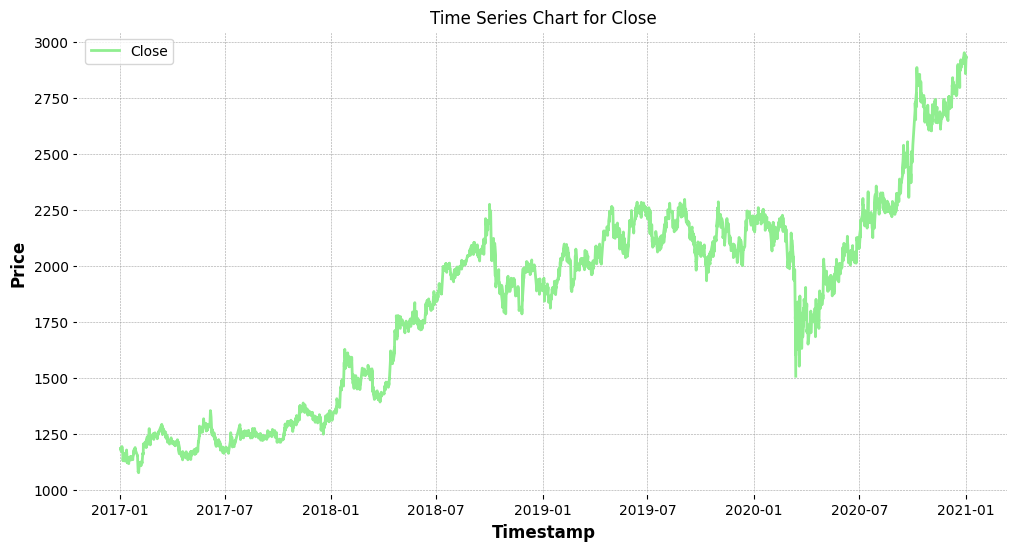

In [29]:
import matplotlib.pyplot as plt
# Plotting Time Series Chart for 'close' column
plt.figure(figsize=(12, 6))

plt.plot(df.index, df['close'], label='Close', color='lightgreen')

plt.xlabel('Timestamp')
plt.ylabel('Price')
plt.title('Time Series Chart for Close')
plt.legend()
plt.show()


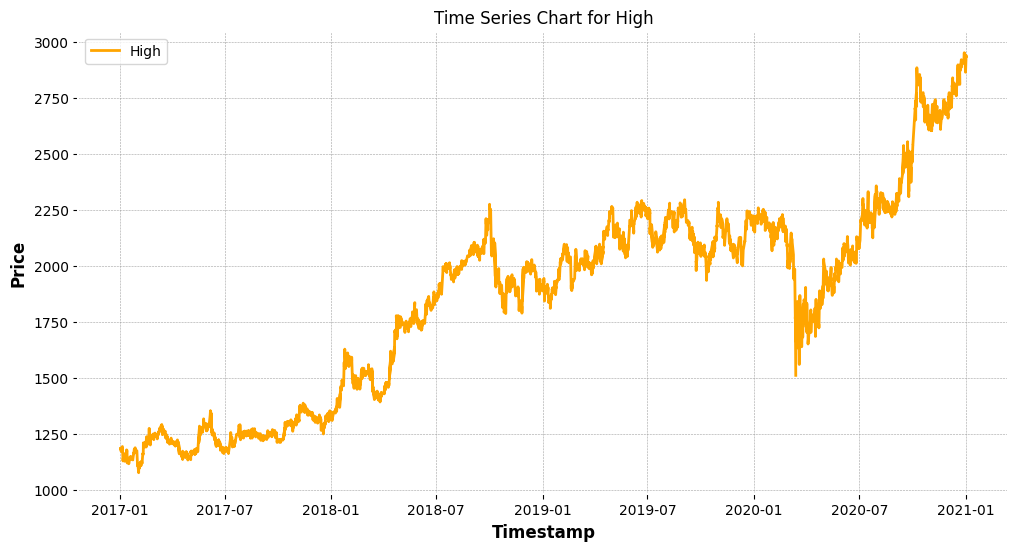

In [30]:
import matplotlib.pyplot as plt
# Plotting Time Series Chart for 'high' column
plt.figure(figsize=(12, 6))

plt.plot(df.index, df['high'], label='High', color='orange')

plt.xlabel('Timestamp')
plt.ylabel('Price')
plt.title('Time Series Chart for High')
plt.legend()
plt.show()


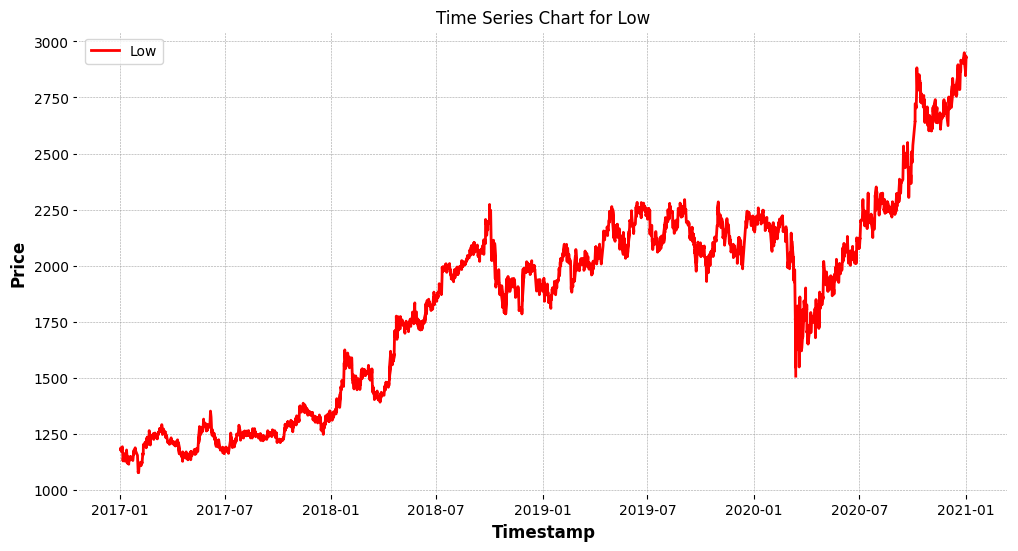

In [31]:
import matplotlib.pyplot as plt
# Plotting Time Series Chart for 'low' column
plt.figure(figsize=(12, 6))

plt.plot(df.index, df['low'], label='Low', color='red')

plt.xlabel('Timestamp')
plt.ylabel('Price')
plt.title('Time Series Chart for Low')
plt.legend()
plt.show()


Time series forcasting

Here we will do live stoc market forcasting

Importing and downloading library requires

In [32]:
!pip install yfinance plotly pandas statsmodels

Genrating data online from yfinance

In [33]:
import yfinance as yf

# Fetch live stock data for TCS (NSE)
ticker = 'TCS.NS'
data = yf.download(ticker, period='1d', interval='1m')

# Preview the data
print(data.head())


[*********************100%***********************]  1 of 1 completed

                                  Open         High          Low        Close  \
Datetime                                                                        
2024-10-07 09:15:00+05:30  4273.899902  4276.950195  4262.799805  4276.200195   
2024-10-07 09:16:00+05:30  4276.250000  4279.450195  4274.000000  4276.649902   
2024-10-07 09:17:00+05:30  4277.000000  4278.600098  4270.149902  4272.000000   
2024-10-07 09:18:00+05:30  4271.950195  4278.200195  4268.899902  4273.799805   
2024-10-07 09:19:00+05:30  4272.100098  4275.350098  4267.149902  4271.000000   

                             Adj Close  Volume  
Datetime                                        
2024-10-07 09:15:00+05:30  4276.200195       0  
2024-10-07 09:16:00+05:30  4276.649902    8536  
2024-10-07 09:17:00+05:30  4272.000000    7912  
2024-10-07 09:18:00+05:30  4273.799805    8070  
2024-10-07 09:19:00+05:30  4271.000000    4237  


decplaying the data and downloading the data in csv format

In [34]:
import pandas as pd

# Display the data in a table format
print(data.to_string())

# Create a CSV file and download it
from google.colab import files
data.to_csv('tcs_stock_data.csv')
files.download('tcs_stock_data.csv')


                                  Open         High          Low        Close    Adj Close  Volume
Datetime                                                                                          
2024-10-07 09:15:00+05:30  4273.899902  4276.950195  4262.799805  4276.200195  4276.200195       0
2024-10-07 09:16:00+05:30  4276.250000  4279.450195  4274.000000  4276.649902  4276.649902    8536
2024-10-07 09:17:00+05:30  4277.000000  4278.600098  4270.149902  4272.000000  4272.000000    7912
2024-10-07 09:18:00+05:30  4271.950195  4278.200195  4268.899902  4273.799805  4273.799805    8070
2024-10-07 09:19:00+05:30  4272.100098  4275.350098  4267.149902  4271.000000  4271.000000    4237
2024-10-07 09:20:00+05:30  4272.100098  4272.149902  4268.000000  4268.000000  4268.000000    6641
2024-10-07 09:21:00+05:30  4268.750000  4274.000000  4267.000000  4273.350098  4273.350098    2822
2024-10-07 09:22:00+05:30  4273.799805  4274.799805  4269.750000  4271.000000  4271.000000    3693
2024-10-07

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Visulizing the data

In [35]:
import plotly.graph_objects as go
import pandas as pd

# Real-time plot
fig = go.Figure()

# Candlestick chart for open, high, low, close
fig.add_trace(go.Candlestick(x=data.index,
                open=data['Open'],
                high=data['High'],
                low=data['Low'],
                close=data['Close'],
                name='Market Data'))

# Add titles and labels
fig.update_layout(
    title=f'{ticker} Live Price Data',
    xaxis_title='Time',
    yaxis_title='Stock Price (INR)',
    xaxis_rangeslider_visible=False)

fig.show()


Forcasting using ARIMA(auto-regressive integrated moving avrage)

In [36]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Forecast using ARIMA on the closing price
close_prices = data['Close'].dropna()

# Fit ARIMA model
model = ARIMA(close_prices, order=(5,1,0))
model_fit = model.fit()

# Forecast next 10 minutes
forecast = model_fit.forecast(steps=10)
print(forecast)


2024-10-07 11:15:00+05:30    4240.068031
2024-10-07 11:16:00+05:30    4239.201877
2024-10-07 11:17:00+05:30    4239.704185
2024-10-07 11:18:00+05:30    4240.241432
2024-10-07 11:19:00+05:30    4240.263906
2024-10-07 11:20:00+05:30    4240.132447
2024-10-07 11:21:00+05:30    4240.177726
2024-10-07 11:22:00+05:30    4240.247877
2024-10-07 11:23:00+05:30    4240.250389
2024-10-07 11:24:00+05:30    4240.235989
Freq: min, Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency min will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency min will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency min will be used.



visulizing forcasting

In [37]:
import numpy as np

# Combine live data and forecasts
forecast_index = pd.date_range(data.index[-1], periods=11, freq='T')[1:]
forecast_series = pd.Series(forecast, index=forecast_index)

# Plot the forecast
fig.add_trace(go.Scatter(x=forecast_series.index, y=forecast_series, mode='lines', name='Forecast'))

# Update the figure to include forecasts
fig.show()


<ipython-input-37-5239c802d693>:4: FutureWarning:

'T' is deprecated and will be removed in a future version, please use 'min' instead.



Recommendation using random forest


In [38]:
import pandas as pd
import numpy as np

# Add moving averages as features
data['SMA_5'] = data['Close'].rolling(window=5).mean()
data['SMA_10'] = data['Close'].rolling(window=10).mean()

# Add percentage change feature
data['Pct_Change'] = data['Close'].pct_change()

# Add volatility (standard deviation of the closing price)
data['Volatility'] = data['Close'].rolling(window=10).std()

# Drop any rows with NaN values after adding features
data.dropna(inplace=True)


In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Label the target: 1 for hold, 0 for sell
# You can define the logic for labeling (e.g., if price increases 5% in next n minutes)
data['Target'] = np.where(data['Close'].shift(-1) > data['Close'], 1, 0)

# Features and target variable
features = ['SMA_5', 'SMA_10', 'Pct_Change', 'Volatility']
X = data[features]
y = data['Target']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a RandomForest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on test data and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy*100:.2f}%")


Model Accuracy: 41.18%


In [40]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Fetch historical stock data for TCS (NSE)
ticker = 'TCS.NS'
data = yf.download(ticker, period='1y', interval='1d')

# Feature Engineering: Creating moving averages and technical indicators
data['SMA_10'] = data['Close'].rolling(window=10).mean()
data['SMA_20'] = data['Close'].rolling(window=20).mean()

# Lagging the 'Close' column to predict future price movements
data['Price_Change'] = data['Close'].shift(-1) - data['Close']
data['Target'] = np.where(data['Price_Change'] > 0, 0, 1)  # 0 = Hold, 1 = Sell

# Drop missing values caused by rolling window calculations
data.dropna(inplace=True)

# Features (X) and Target (y)
X = data[['SMA_10', 'SMA_20', 'Close']]  # Features: Moving averages and close price
y = data['Target']  # Target: Hold (0) or Sell (1)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


[*********************100%***********************]  1 of 1 completed


In [41]:
# Linear Regression for stock price prediction
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predicting the target using the test set
lr_pred = np.where(lr_model.predict(X_test) > 0.5, 1, 0)

# Accuracy score for Linear Regression
lr_accuracy = accuracy_score(y_test, lr_pred)
print(f'Linear Regression Accuracy: {lr_accuracy * 100:.2f}%')


Linear Regression Accuracy: 55.56%


In [42]:
# SVM for classification
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Predicting the target using the test set
svm_pred = svm_model.predict(X_test)

# Accuracy score for SVM
svm_accuracy = accuracy_score(y_test, svm_pred)
print(f'SVM Accuracy: {svm_accuracy * 100:.2f}%')


SVM Accuracy: 51.11%


In [43]:
# Decision Tree Classifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

# Predicting the target using the test set
dt_pred = dt_model.predict(X_test)

# Accuracy score for Decision Tree
dt_accuracy = accuracy_score(y_test, dt_pred)
print(f'Decision Tree Accuracy: {dt_accuracy * 100:.2f}%')


Decision Tree Accuracy: 48.89%


After tuning accuracy

In [44]:
!pip install ta

  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29412 sha256=360d7743124a49e8d2ac9582c3828513deb3ed2a9865c01d41114e92b411ce14
  Stored in directory: /root/.cache/pip/wheels/5f/67/4f/8a9f252836e053e532c6587a3230bc72a4deb16b03a829610b
Successfully built ta


In [45]:
import ta

# Add technical indicators
data['EMA_10'] = ta.trend.ema_indicator(data['Close'], window=10)
data['EMA_20'] = ta.trend.ema_indicator(data['Close'], window=20)
data['RSI'] = ta.momentum.rsi(data['Close'], window=14)
data['Bollinger_High'] = ta.volatility.bollinger_hband(data['Close'], window=20)
data['Bollinger_Low'] = ta.volatility.bollinger_lband(data['Close'], window=20)

# Add lag features
data['Lag_1'] = data['Close'].shift(1)
data['Lag_2'] = data['Close'].shift(2)

# Drop NaNs caused by new feature creation
data.dropna(inplace=True)

# Feature and Target setup
X = data[['EMA_10', 'EMA_20', 'RSI', 'Bollinger_High', 'Bollinger_Low', 'Lag_1', 'Lag_2', 'Close']]
y = data['Target']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Initialize RandomForest with default params
rf = RandomForestClassifier()

# Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# GridSearchCV for tuning
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best hyperparameters
print(f'Best Parameters: {grid_search.best_params_}')

# Predict using the best model
rf_best = grid_search.best_estimator_
rf_pred = rf_best.predict(X_test)

# Accuracy of the best model
rf_accuracy = accuracy_score(y_test, rf_pred)
print(f'Random Forest Accuracy after tuning: {rf_accuracy * 100:.2f}%')


Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}
Random Forest Accuracy after tuning: 48.78%


In [47]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# SVM classifier
svm = SVC()

# Define parameter grid for SVM
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# GridSearchCV for SVM
grid_search_svm = GridSearchCV(estimator=svm, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search_svm.fit(X_train, y_train)

# Best hyperparameters
print(f'Best Parameters (SVM): {grid_search_svm.best_params_}')

# Predict using the best SVM model
svm_best = grid_search_svm.best_estimator_
svm_pred = svm_best.predict(X_test)

# Accuracy of the best SVM model
svm_accuracy = accuracy_score(y_test, svm_pred)
print(f'SVM Accuracy after tuning: {svm_accuracy * 100:.2f}%')


Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best Parameters (SVM): {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
SVM Accuracy after tuning: 51.22%


In [48]:
# Use class weights for DecisionTreeClassifier
dt = DecisionTreeClassifier(class_weight='balanced')
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred)
print(f'Decision Tree Accuracy with balanced class weights: {dt_accuracy * 100:.2f}%')


Decision Tree Accuracy with balanced class weights: 58.54%


In [49]:
from sklearn.ensemble import VotingClassifier

# Define the ensemble of models
ensemble = VotingClassifier(estimators=[
    ('rf', rf_best),
    ('svm', svm_best),
    ('dt', dt_model)], voting='hard')

# Train the ensemble
ensemble.fit(X_train, y_train)

# Predict and evaluate the ensemble
ensemble_pred = ensemble.predict(X_test)
ensemble_accuracy = accuracy_score(y_test, ensemble_pred)
print(f'Ensemble Accuracy: {ensemble_accuracy * 100:.2f}%')


Ensemble Accuracy: 58.54%


In [50]:
# Now, with your forecast data, calculate similar features for prediction
forecast_series_df = pd.DataFrame({'Close': forecast})

# Add the same features to the forecasted data
forecast_series_df['SMA_5'] = forecast_series_df['Close'].rolling(window=5).mean()
forecast_series_df['SMA_10'] = forecast_series_df['Close'].rolling(window=10).mean()
forecast_series_df['Pct_Change'] = forecast_series_df['Close'].pct_change()
forecast_series_df['Volatility'] = forecast_series_df['Close'].rolling(window=10).std()

# Drop NaN values in the forecast
forecast_series_df.dropna(inplace=True)

# Predict hold or sell using the trained model
forecast_features = forecast_series_df[features]
forecast_pred = model.predict(forecast_features)

# Based on predictions, give recommendation
for i, pred in enumerate(forecast_pred):
    if pred == 1:
        print(f"Recommendation: HOLD. Expected profit in the next period.")
    else:
        print(f"Recommendation: SELL. No significant profit expected.")


Recommendation: HOLD. Expected profit in the next period.


as decision tree is has highest acuracy using it


In [52]:
import pandas as pd
import ta  # Assuming you're using the 'ta' library

# Now, with your forecast data, calculate similar features for prediction
forecast_series_df = pd.DataFrame({'Close': forecast})

# Add the same features to the forecasted data
forecast_series_df['EMA_10'] = ta.trend.ema_indicator(forecast_series_df['Close'], window=10)
forecast_series_df['EMA_20'] = ta.trend.ema_indicator(forecast_series_df['Close'], window=20)
forecast_series_df['RSI'] = ta.momentum.rsi(forecast_series_df['Close'], window=14)
forecast_series_df['Bollinger_High'] = ta.volatility.bollinger_hband(forecast_series_df['Close'], window=20)
forecast_series_df['Bollinger_Low'] = ta.volatility.bollinger_lband(forecast_series_df['Close'], window=20)
forecast_series_df['Lag_1'] = forecast_series_df['Close'].shift(1)
forecast_series_df['Lag_2'] = forecast_series_df['Close'].shift(2)

# Instead of dropping all NaN values, fill them using forward fill:
forecast_series_df.fillna(method='ffill', inplace=True)
# If forward fill doesn't work well, consider using 'bfill' (backward fill) or a specific value.

# Check if the DataFrame is still empty after filling NaN values:
if forecast_series_df.empty:
    print("Warning: Forecast DataFrame is empty after filling NaN values. Check your forecast data or feature calculation.")
else:
    # Predict hold or sell using the trained model
    forecast_features = forecast_series_df[['EMA_10', 'EMA_20', 'RSI', 'Bollinger_High', 'Bollinger_Low', 'Lag_1', 'Lag_2', 'Close']]
    forecast_pred = dt.predict(forecast_features)

    # Based on predictions, give recommendation
    for i, pred in enumerate(forecast_pred):
        if pred == 0:
            print(f"Recommendation: HOLD. Expected profit in the next period.")
        else:
            print(f"Recommendation: SELL. No significant profit expected.")

Recommendation: SELL. No significant profit expected.
Recommendation: SELL. No significant profit expected.
Recommendation: SELL. No significant profit expected.
Recommendation: SELL. No significant profit expected.
Recommendation: SELL. No significant profit expected.
Recommendation: SELL. No significant profit expected.
Recommendation: SELL. No significant profit expected.
Recommendation: SELL. No significant profit expected.
Recommendation: SELL. No significant profit expected.
Recommendation: SELL. No significant profit expected.


<ipython-input-52-fa3cc3274e33>:17: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

